# Cambio de base 
Concepto de cambio de base en ℝ²
Cómo expresar un vector en una base distinta a la canónica, cómo visualizarlo y por qué esto es relevante en ciencia de datos (ej. PCA, compresión, reducción de dimensiones).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Base canonica 
e1 = np.array([1, 0])
e2 = np.array([0, 1])
E = np.column_stack((e1, e2)) # Matriz de base estandar

# Nueva base (rotada 45º)
theta = np.pi / 4
v1 = np.array([np.cos(theta), np.sin(theta)])
v2 = np.array([-np.sin(theta), np.cos(theta)])
B = np.column_stack((v1, v2)) # Matriz de nueva base

# Vector original (en base canonica) 
x = np.array([2, 1])

"""
En esta celda hemos creado una base canonica E, una nueva base rotada B y un vector
que vive en la base canonica.
"""

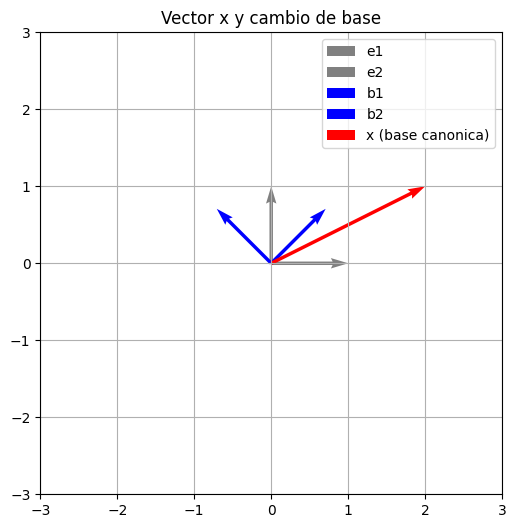

In [2]:
def plot_bases_and_vector(E, B, x):
    fig, ax = plt.subplots(figsize=(6,6))

    # Base canonica
    ax.quiver(0, 0, E[0, 0], E[1, 0], angles='xy', scale_units='xy', scale=1, color='gray', label='e1')
    ax.quiver(0, 0, E[0, 1], E[1, 1], angles='xy', scale_units='xy', scale=1, color='gray', label='e2')

    # Nueva base
    ax.quiver(0, 0, B[0, 0], B[1, 0], angles='xy', scale_units='xy', scale=1, color='blue', label='b1')
    ax.quiver(0, 0, B[0, 1], B[1, 1], angles='xy', scale_units='xy', scale=1, color='blue', label='b2')

    # Vector original
    ax.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='red', label='x (base canonica)')

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.grid()
    ax.set_aspect('equal')
    ax.legend()
    plt.title("Vector x y cambio de base")
    plt.show()

plot_bases_and_vector(E, B, x)

### 📌 Resumen del estado actual

- He definido una **base canónica** (e1, e2) que representa el sistema de coordenadas estándar.
- He definido una **nueva base** `B`, rotada 45°, con vectores b1 y b2.
- He creado un vector `x` que vive en el sistema original (base canónica).
- He visualizado todo en el plano: la base canónica (gris), la nueva base (azul), y el vector `x` (rojo).

Aún no he expresado `x` en coordenadas de la base `B`.

In [3]:
# Coordenadas de x en la base B
x_coords_en_B = np.linalg.inv(B) @ x
print("Coordenadas de x en la base B: ", x_coords_en_B)

Coordenadas de x en la base B:  [ 2.12132034 -0.70710678]


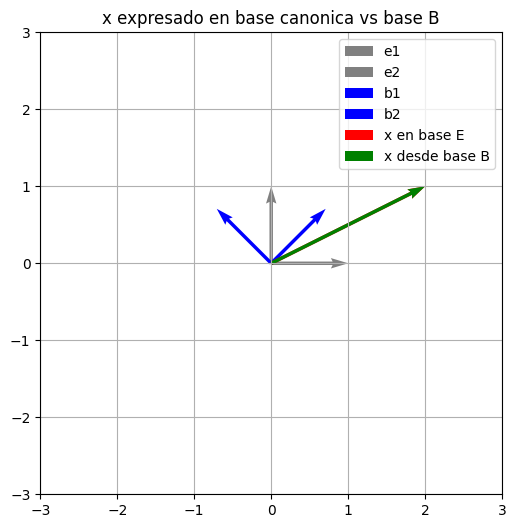

In [6]:
# Reconstruimos el vector usando la base B 
x_from_B = B @ x_coords_en_B

# Graficamos todo
def plot_vector_ambas_bases(E, B, x, x_from_B):
    fig, ax = plt.subplots(figsize=(6,6))

    # Base canonica 
    ax.quiver(0, 0, E[0,0], E[1,0], angles='xy', scale_units='xy', scale=1, color='gray', label='e1')
    ax.quiver(0, 0, E[0,1], E[1,1], angles='xy', scale_units='xy', scale=1, color='gray', label='e2')

    # Nueva base
    ax.quiver(0, 0, B[0,0], B[1,0], angles='xy', scale_units='xy', scale=1, color='blue', label='b1')
    ax.quiver(0, 0, B[0,1], B[1,1], angles='xy', scale_units='xy', scale=1, color='blue', label='b2')

    # Vector en base canonica
    ax.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='red', label='x en base E')

    # Vector reconstruido desde coordenadasd en base B
    ax.quiver(0, 0, x_from_B[0], x_from_B[1], angles='xy', scale_units='xy', scale=1, color='green', label='x desde base B')

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.grid()
    ax.set_aspect('equal')
    ax.legend()
    plt.title("x expresado en base canonica vs base B")
    plt.show()

plot_vector_ambas_bases(E, B, x, x_from_B)